# VISUALIZE BEADS REGISTRATION OF CHANNELS

`conda activate imgpro`

In [19]:
import os
import glob
import tifffile
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt
import scipy.ndimage as ndi

from microfilm.microplot import microshow
from microfilm.microplot import Micropanel
from microfilm.microanim import Microanim
from microfilm.microanim import Microanimpanel
from microfilm.microplot import Microimage

DATA_PTH = r'C:\Users\munib\POSTDOC\DATA\fluorescent_beads_ch_align\20251219'
pth_1_20 = os.path.join(DATA_PTH,'date-20251219_strain-ISg5HT_condition-fedpatch_worm008')
pth_1_50 = os.path.join(DATA_PTH,'date-20251219_strain-ISg5HT_condition-fedpatch_worm006')
pth_1_100 = os.path.join(DATA_PTH,'date-20251219_strain-ISg5HT_condition-fedpatch_worm007')

pth = pth_1_50

TIF_PTH = os.path.join(pth,'tif')
ALIGN_PTH = os.path.join(pth,'aligned')

tif_glob = glob.glob(os.path.join(TIF_PTH,'*.tif'))
bead_glob = glob.glob(os.path.join(ALIGN_PTH,'*.tif'))

Z, C, H, W = tifffile.imread(tif_glob[0]).shape
T = len(tif_glob)

tidx = 3

raw = tifffile.imread(tif_glob[tidx])
bead =tifffile.imread(bead_glob[tidx])


# raw = raw[:,:,:,100:200,100:200]
# bead = bead[:,:,:,100:200,100:200]


In [20]:
raw.shape

(39, 2, 512, 512)

In [21]:
raw[21][:,None,:,:].shape

(2, 1, 512, 512)

CREATE PANEL

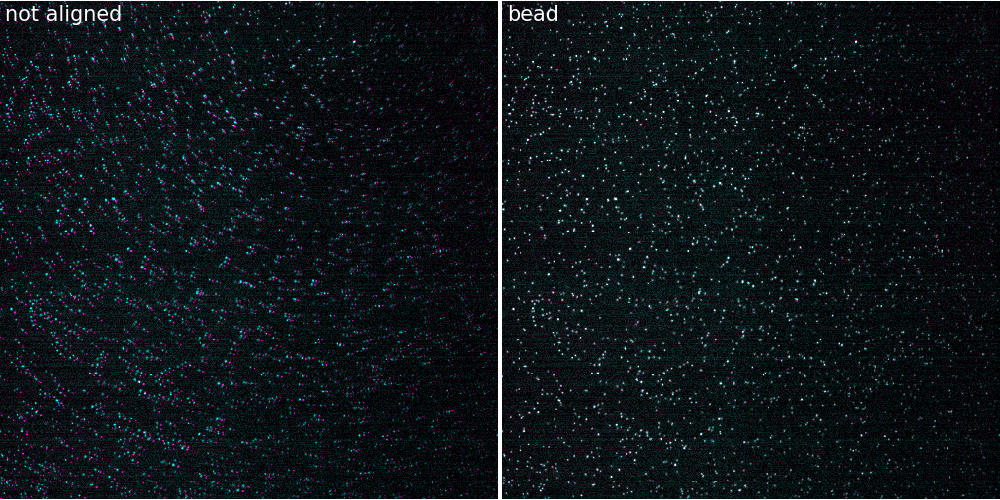

In [22]:
%matplotlib widget

plt.close('all')

mn = 0
mx = 255
# mx = 100
fs = 5

cmap_ref = 'magenta'
cmap_mov_reg = 'cyan'

anim1 = Microanim(
    data=raw[21][:,None,:,:], cmaps=[cmap_ref, cmap_mov_reg], flip_map=False, fig_scaling=fs, dpi=300,
    rescale_type='limits', limits=[mn,mx], label_text='not aligned')
anim2 = Microanim(
    data=bead[21][:,None,:,:], cmaps=[cmap_ref, cmap_mov_reg], flip_map=False, fig_scaling=fs, dpi=300,
    rescale_type='limits', limits=[mn,mx], label_text='bead')

plt.close('all')

animpanel = Microanimpanel(rows=1, cols=2,)
animpanel.add_element(pos=[0,0], microanim=anim1)
animpanel.add_element(pos=[0,1], microanim=anim2)


animpanel.ui



# COMPARE BEADS REGISTRATION TO 'MEDIAN' WORM REGISTRATION

In [9]:
import os
import glob
import tifffile
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt
import scipy.ndimage as ndi

from microfilm.microplot import microshow
from microfilm.microplot import Micropanel
from microfilm.microanim import Microanim
from microfilm.microanim import Microanimpanel
from microfilm.microplot import Microimage

DATA_PTH = r'C:\Users\munib\POSTDOC\DATA\fluorescent_beads_ch_align\20251219\date-20251219_strain-ISg5HT_condition-fedpatch_worm008'
TIF_PTH = os.path.join(DATA_PTH,'tif')
ALIGN_BEADS_PTH = os.path.join(DATA_PTH,'aligned_beads')
ALIGN_WORM_PTH = os.path.join(DATA_PTH,'aligned_median_worm')

tif_glob = glob.glob(os.path.join(TIF_PTH,'*.tif'))
bead_glob = glob.glob(os.path.join(ALIGN_BEADS_PTH,'*.tif'))
worm_glob = glob.glob(os.path.join(ALIGN_WORM_PTH,'*.tif'))

Z, C, H, W = tifffile.imread(tif_glob[0]).shape
T = len(tif_glob)

raw = np.zeros((Z,C,T,H,W))
bead = raw.copy()
worm = raw.copy()
for i in tqdm(range(T)):
    raw[:,:,i,:,:] = tifffile.imread(tif_glob[i])
    bead[:,:,i,:,:] = tifffile.imread(bead_glob[i])
    worm[:,:,i,:,:] = tifffile.imread(worm_glob[i])


raw = raw[:,:,:,100:200,100:200]
bead = bead[:,:,:,100:200,100:200]
worm = worm[:,:,:,100:200,100:200]

100%|██████████| 14/14 [00:02<00:00,  4.89it/s]


In [19]:
raw.shape # ZCTHW

(39, 2, 14, 100, 100)

CREATE PANEL

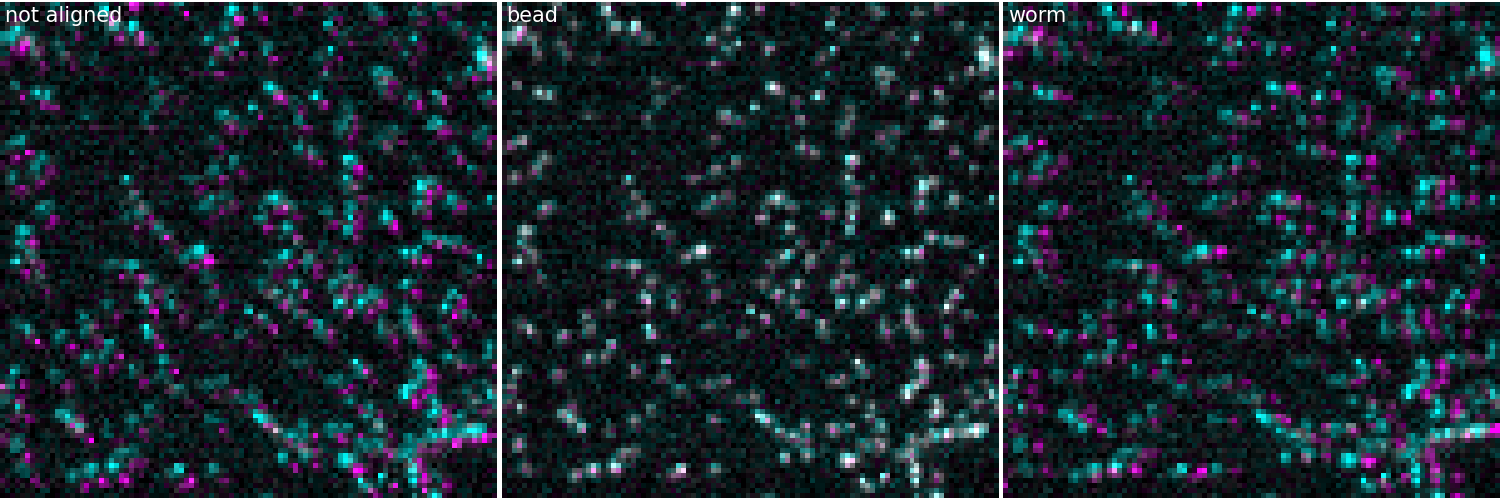

In [20]:
%matplotlib widget

plt.close('all')

mn = 0
mx = 255
# mx = 100
fs = 5

cmap_ref = 'magenta'
cmap_mov_reg = 'cyan'

anim1 = Microanim(
    data=raw[21], cmaps=[cmap_ref, cmap_mov_reg], flip_map=False, fig_scaling=fs, dpi=300,
    rescale_type='limits', limits=[mn,mx], label_text='not aligned')
anim2 = Microanim(
    data=bead[21], cmaps=[cmap_ref, cmap_mov_reg], flip_map=False, fig_scaling=fs, dpi=300,
    rescale_type='limits', limits=[mn,mx], label_text='bead')
anim3 = Microanim(
    data=worm[21], cmaps=[cmap_ref, cmap_mov_reg], flip_map=False, fig_scaling=fs, dpi=300,
    rescale_type='limits', limits=[mn,mx], label_text='worm')

plt.close('all')

animpanel = Microanimpanel(rows=1, cols=3,)
animpanel.add_element(pos=[0,0], microanim=anim1)
animpanel.add_element(pos=[0,1], microanim=anim2)
animpanel.add_element(pos=[0,2], microanim=anim3)


animpanel.ui



SAVE MOVIE

In [ ]:
OUT_DIR = 'reg_vids'
OUT_FN = ''

animpanel.save_movie(os.path.join(DATA_PTH,OUT_DIR,OUT_FN), quality=10, fps=6)